In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
from keras.utils.vis_utils import plot_model
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.applications import VGG19,ResNet50

In [ ]:
 (X_train, y_train), (X_test, y_test) = cifar10.load_data()  # Loading the data

170500096/170498071 [==============================] - 3s 0us/step


In [ ]:
print(f'Imagem train shape: {X_train.shape}')
print(f'Training label shape: {y_train.shape}')
print(f'Imagem test shape: {X_test.shape}')
print(f'Test label shape: {y_test.shape}')t

Imagem train shape: (50000, 32, 32, 3)
Training label shape: (50000, 1)
Imagem test shape: (10000, 32, 32, 3)
Test label shape: (10000, 1)


In [ ]:
y_train = y_train.reshape(-1, )  # Changing the label to one dimesison array 
y_test = y_test.reshape(-1, )

In [ ]:
label_name = {0:'airplane', 1:'automobile', 2:'bird', 3:'cat', 4:'deer', 5:'dog', 6:'frog', 7:'horse', 8:'ship', 9:'truck'}

Showing some samples from the dataset 

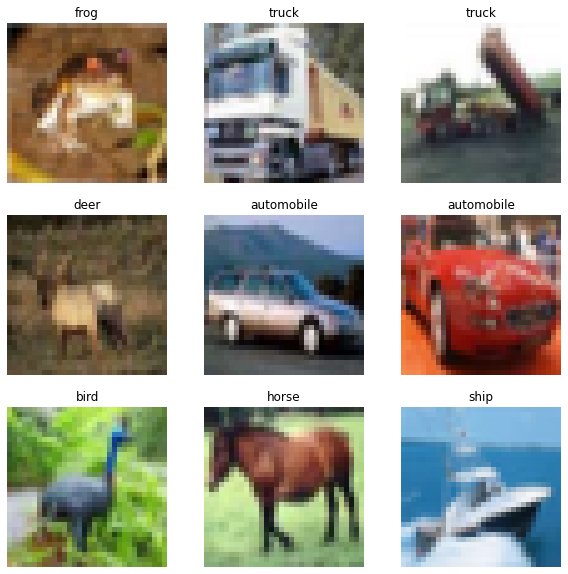

In [ ]:
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_train[i])
    plt.title(label_name.get(y_train[i]))
    plt.axis("off")

Normalizing the data to 0-255

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0 

> ## CNN 1 

In [ ]:
cnn_model_1 = Sequential([
                          Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
                          MaxPooling2D((2, 2)),
                          Conv2D(32, kernel_size=(3, 3), activation='relu'),
                          MaxPooling2D((2, 2)),

                          Flatten(),
                          Dense(64),
                          Dense(10, activation='softmax')
])
cnn_model_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                73792     
_________________________________________________________________
dense_4 (Dense)              (None, 10)               

In [ ]:
cnn_model_1.compile(optimizer='adam',
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

In [ ]:
history = cnn_model_1.fit(X_train, y_train, epochs=10, 
                          validation_data=(X_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 84s 54ms/step - loss: 1.6918 - accuracy: 0.3832 - val_loss: 1.2765 - val_accuracy: 0.5486
Epoch 2/10
1563/1563 [==============================] - 84s 54ms/step - loss: 1.2185 - accuracy: 0.5728 - val_loss: 1.1200 - val_accuracy: 0.6044
Epoch 3/10
1563/1563 [==============================] - 85s 54ms/step - loss: 1.0884 - accuracy: 0.6215 - val_loss: 1.0696 - val_accuracy: 0.6230
Epoch 4/10
1563/1563 [==============================] - 81s 52ms/step - loss: 1.0208 - accuracy: 0.6462 - val_loss: 1.0244 - val_accuracy: 0.6449
Epoch 5/10
1563/1563 [==============================] - 81s 52ms/step - loss: 0.9830 - accuracy: 0.6556 - val_loss: 0.9804 - val_accuracy: 0.6627
Epoch 6/10
1563/1563 [==============================] - 81s 52ms/step - loss: 0.9313 - accuracy: 0.6788 - val_loss: 1.0022 - val_accuracy: 0.6580
Epoch 7/10
1563/1563 [==============================] - 81s 52ms/step - loss: 0.8983 - accuracy: 0.6908 - val_loss: 0.9619 -

313/313 - 4s - loss: 0.9679 - accuracy: 0.6716


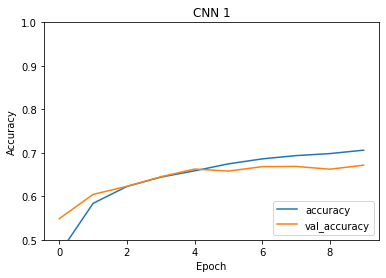

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.title('CNN 1')
plt.legend(loc='lower right')

test_loss, test_acc = cnn_model_1.evaluate(X_test,  y_test, verbose=2)

In [ ]:
y_pred = cnn_model_1.predict(X_test)
y_pred[:5]

array([[1.06453575e-04, 2.16744957e-05, 3.50892358e-03, 4.70235527e-01,
        1.98726007e-03, 1.53983787e-01, 3.66029322e-01, 9.81394187e-05,
        3.95206269e-03, 7.66657613e-05],
       [5.09104915e-02, 2.12449044e-01, 6.79708182e-06, 7.07618540e-07,
        5.61552838e-07, 5.99692429e-09, 1.52293573e-08, 8.34249306e-07,
        7.31026351e-01, 5.60514955e-03],
       [1.94885060e-01, 1.94071636e-01, 1.85531043e-02, 6.67769536e-02,
        4.36467770e-03, 2.61142082e-03, 2.09491653e-03, 2.19553024e-01,
        2.67044932e-01, 3.00442167e-02],
       [8.40279937e-01, 5.40443091e-03, 4.72426927e-03, 1.32040106e-04,
        1.13573798e-04, 4.57345050e-06, 2.94621568e-05, 1.20853139e-04,
        1.49082512e-01, 1.08393440e-04],
       [8.27534848e-07, 3.77744556e-07, 5.52388048e-03, 1.08878873e-02,
        4.18018922e-02, 2.84375111e-03, 9.38923597e-01, 8.12946928e-06,
        8.73660611e-06, 9.51137054e-07]], dtype=float32)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
print(f'CNN assert: {y_classes[:15]}, Expected result: {y_test[:15]}')

CNN assert: [3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 4, 9, 4, 7, 9], Expected result: [3 8 8 0 6 6 1 6 3 1 0 9 5 7 9]


CNN 2

In [ ]:
cnn_model_2 = Sequential([
                          Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
                          MaxPooling2D((2, 2)),
                          Dropout(0.5),
                          Conv2D(32, kernel_size=(3, 3), activation='relu'),
                          MaxPooling2D((2, 2)),
                          Dropout(0.5),
                          Conv2D(32, kernel_size=(3, 3), activation='relu'),
                          MaxPooling2D((2, 2)),

                          Flatten(),
                          Dense(64),
                          Dense(10, activation='softmax')
])

cnn_model_2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 32)        18464     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 32)         

In [ ]:
cnn_model_2.compile(optimizer='adam',
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

In [ ]:
history = cnn_model_2.fit(X_train, y_train, epochs=10, 
                          validation_data=(X_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 94s 60ms/step - loss: 1.9526 - accuracy: 0.2669 - val_loss: 1.4645 - val_accuracy: 0.4850
Epoch 2/10
1563/1563 [==============================] - 92s 59ms/step - loss: 1.4776 - accuracy: 0.4647 - val_loss: 1.3763 - val_accuracy: 0.5051
Epoch 3/10
1563/1563 [==============================] - 93s 59ms/step - loss: 1.3772 - accuracy: 0.5034 - val_loss: 1.3163 - val_accuracy: 0.5342
Epoch 4/10
1563/1563 [==============================] - 93s 59ms/step - loss: 1.3166 - accuracy: 0.5263 - val_loss: 1.2649 - val_accuracy: 0.5425
Epoch 5/10
1563/1563 [==============================] - 93s 59ms/step - loss: 1.2681 - accuracy: 0.5461 - val_loss: 1.1969 - val_accuracy: 0.5763
Epoch 6/10
1563/1563 [==============================] - 93s 60ms/step - loss: 1.2412 - accuracy: 0.5549 - val_loss: 1.2183 - val_accuracy: 0.5605
Epoch 7/10
1563/1563 [==============================] - 93s 59ms/step - loss: 1.2173 - accuracy: 0.5664 - val_loss: 1.1653 -

313/313 - 4s - loss: 1.0857 - accuracy: 0.6297


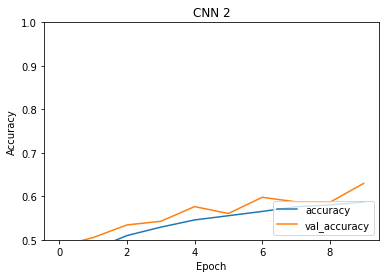

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.title('CNN 2')
plt.legend(loc='lower right')

test_loss, test_acc = cnn_model_2.evaluate(X_test,  y_test, verbose=2)

In [ ]:
y_pred = cnn_model_2.predict(X_test)
y_pred[:5]

array([[3.14312615e-02, 6.59845443e-03, 7.87299275e-02, 3.93345714e-01,
        3.24056521e-02, 1.40525460e-01, 5.36307320e-02, 8.90579447e-03,
        2.05711469e-01, 4.87155542e-02],
       [8.71831924e-02, 2.19606116e-01, 6.49586087e-04, 2.73925922e-04,
        6.30911323e-04, 4.20257311e-05, 1.21843223e-04, 2.17885376e-04,
        6.05388761e-01, 8.58857408e-02],
       [8.47239718e-02, 1.73298851e-01, 1.89872235e-02, 2.71331742e-02,
        1.35149155e-02, 8.77262279e-03, 1.23443017e-02, 5.67696104e-03,
        6.02469742e-01, 5.30782714e-02],
       [3.14635128e-01, 6.92376867e-02, 3.29832286e-02, 2.03642230e-02,
        5.05795516e-03, 4.95516136e-03, 5.58633124e-03, 6.65307604e-03,
        4.97603804e-01, 4.29233797e-02],
       [4.53286601e-04, 8.04453739e-04, 7.40407407e-02, 5.87998405e-02,
        2.34742492e-01, 2.21144799e-02, 6.05699480e-01, 2.45139911e-03,
        5.73051977e-04, 3.20724241e-04]], dtype=float32)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
print(f'CNN assert: {y_classes[:15]}, Expected result: {y_test[:15]}')

CNN assert: [3, 8, 8, 8, 6, 6, 1, 6, 3, 1, 0, 9, 6, 7, 9], Expected result: [3 8 8 0 6 6 1 6 3 1 0 9 5 7 9]



## Transfer Learning


#### Model 1

In [ ]:
conv_base = ResNet50(weights='imagenet', 
                     include_top=False, 
                     input_shape=(32, 32, 3))

94773248/94765736 [==============================] - 1s 0us/step


In [ ]:
model_1 = Sequential([
                    conv_base,
                    Flatten(),
                    BatchNormalization(),
                    Dense(10, activation='softmax'),
])

model_1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 1, 1, 2048)        23587712  
_________________________________________________________________
flatten_3 (Flatten)          (None, 2048)              0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 2048)              8192      
_________________________________________________________________
dense_7 (Dense)              (None, 10)                20490     
Total params: 23,616,394
Trainable params: 23,559,178
Non-trainable params: 57,216
_________________________________________________________________


In [ ]:
model_1.compile(optimizer='adam', 
                loss='sparse_categorical_crossentropy', 
                metrics=['accuracy'])

In [ ]:
history = model_1.fit(X_train, y_train, epochs=5, batch_size=256, 
                      validation_data=(X_test, y_test))

Epoch 1/5
196/196 [==============================] - 3409s 17s/step - loss: 1.3805 - accuracy: 0.5522 - val_loss: 4.2178 - val_accuracy: 0.1000
Epoch 2/5
196/196 [==============================] - 3426s 17s/step - loss: 0.5814 - accuracy: 0.8030 - val_loss: 4.2493 - val_accuracy: 0.1000
Epoch 3/5
196/196 [==============================] - 3448s 18s/step - loss: 0.4977 - accuracy: 0.8348 - val_loss: 2.8723 - val_accuracy: 0.1163
Epoch 4/5
196/196 [==============================] - 3453s 18s/step - loss: 0.4521 - accuracy: 0.8463 - val_loss: 1.8778 - val_accuracy: 0.4074
Epoch 5/5
196/196 [==============================] - 3456s 18s/step - loss: 0.2886 - accuracy: 0.9031 - val_loss: 1.0573 - val_accuracy: 0.6711


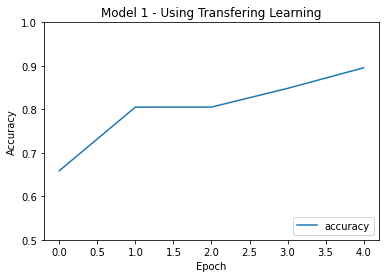

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.title('Model 1 - Using Transfering Learning')
plt.legend(loc='lower right')

In [ ]:
y_pred = model_1.predict(X_test)
y_pred[:5]

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
print(f'CNN assert: {y_classes[:15]}, Expected result: {y_test[:15]}')

CNN assert: [3, 8, 0, 0, 4, 6, 3, 6, 3, 1, 3, 9, 4, 7, 8], Expected result: [3 8 8 0 6 6 1 6 3 1 0 9 5 7 9]


#### Model 2

In [ ]:
model_2 = Sequential([
                     conv_base,
                     Flatten(),
                     BatchNormalization(),
                     Dense(128, activation='relu'),
                     Dropout(0.5),
                     BatchNormalization(),
                     Dense(64, activation='relu'),
                     Dropout(0.5),
                     BatchNormalization(),
                     Dense(10, activation='softmax'),
])

model_2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 1, 1, 2048)        23587712  
_________________________________________________________________
flatten_4 (Flatten)          (None, 2048)              0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 2048)              8192      
_________________________________________________________________
dense_8 (Dense)              (None, 128)               262272    
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 128)               512       
_________________________________________________________________
dense_9 (Dense)              (None, 64)               

In [ ]:
model_2.compile(optimizer='adam', 
                loss='sparse_categorical_crossentropy', 
                metrics=['accuracy'])


In [ ]:
history = model_2.fit(X_train, y_train, epochs=5, batch_size=256, 
                      validation_data=(X_test, y_test))

Epoch 1/5
196/196 [==============================] - 3390s 17s/step - loss: 1.0293 - accuracy: 0.7171 - val_loss: 1.3042 - val_accuracy: 0.6970
Epoch 2/5
196/196 [==============================] - 3368s 17s/step - loss: 0.4895 - accuracy: 0.8704 - val_loss: 1.0465 - val_accuracy: 0.7313
Epoch 3/5
196/196 [==============================] - 3359s 17s/step - loss: 0.4066 - accuracy: 0.8915 - val_loss: 1.1174 - val_accuracy: 0.7277
Epoch 4/5
196/196 [==============================] - 3353s 17s/step - loss: 0.3611 - accuracy: 0.9052 - val_loss: 0.9387 - val_accuracy: 0.7467
Epoch 5/5
196/196 [==============================] - 3369s 17s/step - loss: 0.2991 - accuracy: 0.9214 - val_loss: 1.0782 - val_accuracy: 0.7247


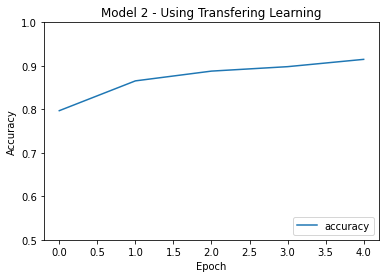

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.title('Model 2 - Using Transfering Learning')
plt.legend(loc='lower right')

In [ ]:
y_pred = model_2.predict(X_test)
y_pred[:5]

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
print(f'CNN assert: {y_classes[:15]}, Expected result: {y_test[:15]}')

CNN assert: [3, 8, 0, 0, 6, 6, 1, 6, 3, 9, 0, 9, 3, 7, 9], Expected result: [3 8 8 0 6 6 1 6 3 1 0 9 5 7 9]


### Plotando os modelos

In [ ]:
plot_model(cnn_model_1, to_file='cnn_model_1.png', show_shapes=True, show_layer_names=True)
plot_model(cnn_model_2, to_file='cnn_model_2.png', show_shapes=True, show_layer_names=True)
plot_model(model_1, to_file='model_1.png', show_shapes=True, show_layer_names=True)
plot_model(model_2, to_file='model_2.png', show_shapes=True, show_layer_names=True)